### Font Set

In [35]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [36]:
plt.style.use('seaborn-white')

<ipython-input-36-2ff7d366684c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [37]:
import matplotlib.pyplot as plt# Set font and font size
plt.rcParams.update({
    'font.family': 'DejaVu Serif',
    'font.size': 10,
    'text.color': 'black', # Setting font color to black
    'figure.facecolor': 'white', # Setting background to white for the entire figure
    'axes.edgecolor': 'black', # Setting axis lines to black
    'axes.facecolor': 'white', # Setting background to white
    })

# Price

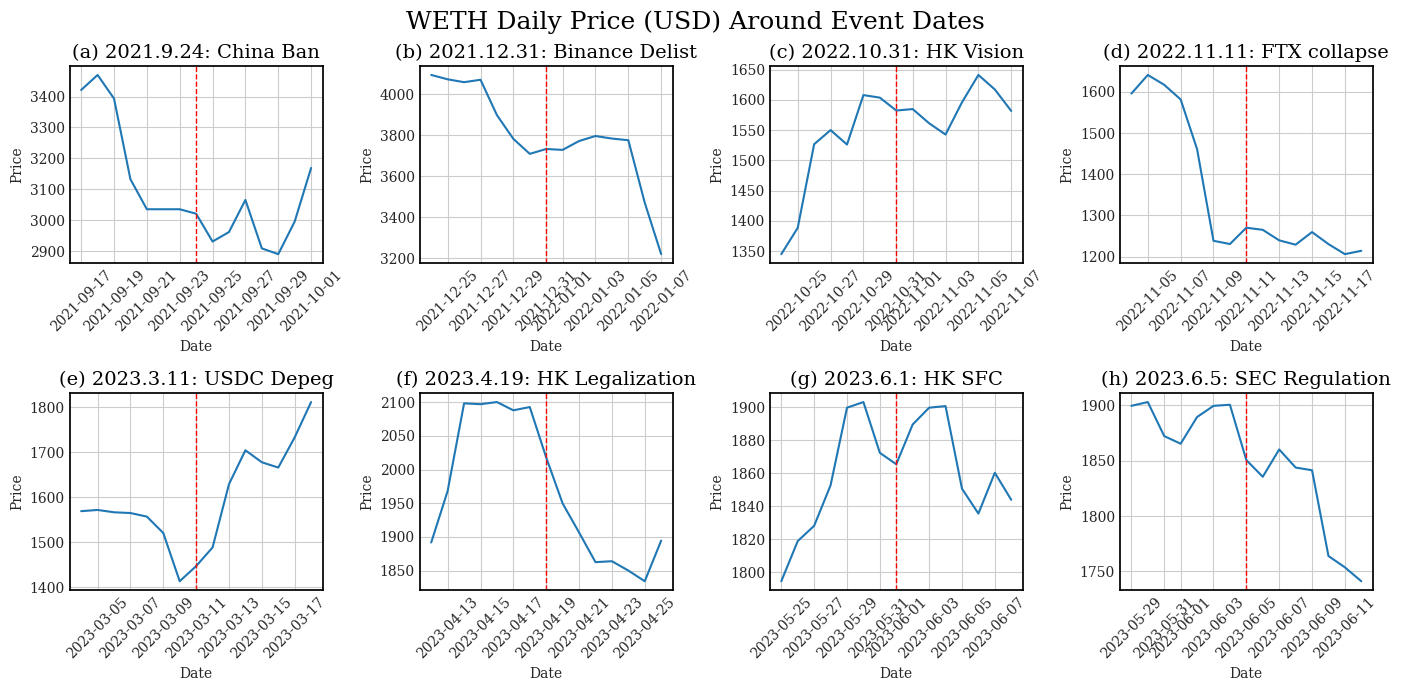

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the GitHub URL
url = 'https://raw.githubusercontent.com/SciEcon/IncidentsAnalysis2023/main/Data/collected/1_Price.csv'
data = pd.read_csv(url)

# Convert the DATE column to datetime objects
data['DATE'] = pd.to_datetime(data['DATE'])

# Define a list of dates to annotate
dates_to_annotate = [
    {'date': '2021-09-24', 'label': '(a) 2021.9.24: China Ban'},
    {'date': '2021-12-31', 'label': '(b) 2021.12.31: Binance Delist'},
    {'date': '2022-10-31', 'label': '(c) 2022.10.31: HK Vision'},
    {'date': '2022-11-11', 'label': '(d) 2022.11.11: FTX collapse'},
    {'date': '2023-03-11', 'label': '(e) 2023.3.11: USDC Depeg'},
    {'date': '2023-04-19', 'label': '(f) 2023.4.19: HK Legalization'},
    {'date': '2023-06-01', 'label': '(g) 2023.6.1: HK SFC'},
    {'date': '2023-06-05', 'label': '(h) 2023.6.5: SEC Regulation'}
]

# Sort the dates_to_annotate by date
dates_to_annotate.sort(key=lambda x: pd.to_datetime(x['date']))

# Define the number of days for the date range (1 week before and 1 week after)
date_range = pd.DateOffset(weeks=1)

# Create subplots for 8 small plots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('WETH Daily Price (USD) Around Event Dates', fontsize=18)

# Iterate through dates and create small plots
for i, date_info in enumerate(dates_to_annotate):
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start = date_to_plot - date_range
    date_end = date_to_plot + date_range
    subset_data = data[(data['DATE'] >= date_start) & (data['DATE'] <= date_end)]

    row = i // 4
    col = i % 4

    axs[row, col].plot(subset_data['DATE'], subset_data['Price'], linestyle='-')
    axs[row, col].set_title(date_info['label'], fontsize=date_info.get('fontsize', 14))
    axs[row, col].set_xlabel('Date', fontsize=date_info.get('fontsize', 10))
    axs[row, col].set_ylabel('Price', fontsize=date_info.get('fontsize', 10))
    axs[row, col].grid(True)

    # Add a red vertical line at the event date
    axs[row, col].axvline(x=date_to_plot, color='red', linestyle='--', linewidth=1)

    # Rotate x-axis labels by 45 degrees
    axs[row, col].tick_params(axis='x', labelrotation=45)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# create a blank DataFrame to store information
statistics_df = pd.DataFrame(columns=['Date', 'Mean_PreviousMonth', 'Mean_NextMonth', 'Mean_Difference'])

# Iterate through dates and create small plots
for date_info in dates_to_annotate:
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start_previous = date_to_plot - pd.DateOffset(weeks=1)
    date_end_previous = date_to_plot
    date_start_next = date_to_plot
    date_end_next = date_to_plot + pd.DateOffset(weeks=1)

    subset_data_previous = data[(data['DATE'] >= date_start_previous) & (data['DATE'] < date_end_previous)]
    subset_data_next = data[(data['DATE'] >= date_start_next) & (data['DATE'] <= date_end_next)]

    statistics = {
        'Date': date_info['date'],
        'Mean_PreviousMonth': subset_data_previous['Price'].mean(),
        'Mean_NextMonth': subset_data_next['Price'].mean(),
        'Mean_Difference': subset_data_next['Price'].mean() - subset_data_previous['Price'].mean()
    }

    statistics_df = pd.concat([statistics_df, pd.DataFrame([statistics])], ignore_index=True)

# Print the DataFrame as a table
print(statistics_df)
statistics_df.to_csv('1_price_statistics_data.csv', index=False)


         Date  Mean_PreviousMonth  Mean_NextMonth  Mean_Difference
0  2021-09-24         3217.769968     2993.261092      -224.508876
1  2021-12-31         3954.688918     3659.697580      -294.991338
2  2022-10-31         1506.898994     1588.451875        81.552881
3  2022-11-11         1480.940952     1239.320244      -241.620708
4  2023-03-11         1537.459107     1644.767789       107.308682
5  2023-04-19         2048.074762     1897.459740      -150.615022
6  2023-06-01         1852.745178     1868.198385        15.453207
7  2023-06-05         1890.066309     1811.263906       -78.802403


# Transaction Flow

## DEX --> CEX

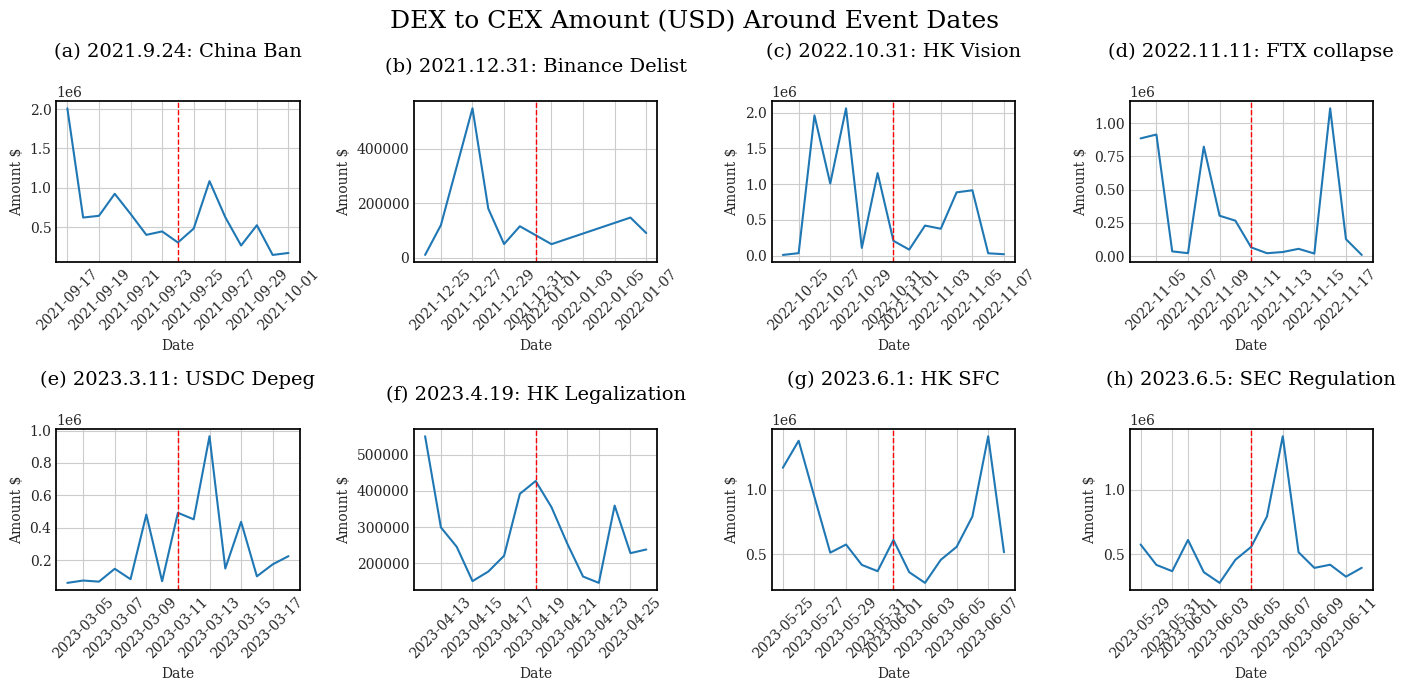

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the GitHub URL
url = 'https://raw.githubusercontent.com/SciEcon/IncidentsAnalysis2023/main/Data/collected/2_Netflow.csv'
data = pd.read_csv(url)

# Convert the DATE column to datetime objects
data['DATE'] = pd.to_datetime(data['DATE'])

# Define a list of dates to annotate
dates_to_annotate = [
    {'date': '2021-09-24', 'label': '(a) 2021.9.24: China Ban'},
    {'date': '2021-12-31', 'label': '(b) 2021.12.31: Binance Delist'},
    {'date': '2022-10-31', 'label': '(c) 2022.10.31: HK Vision'},
    {'date': '2022-11-11', 'label': '(d) 2022.11.11: FTX collapse'},
    {'date': '2023-03-11', 'label': '(e) 2023.3.11: USDC Depeg'},
    {'date': '2023-04-19', 'label': '(f) 2023.4.19: HK Legalization'},
    {'date': '2023-06-01', 'label': '(g) 2023.6.1: HK SFC'},
    {'date': '2023-06-05', 'label': '(h) 2023.6.5: SEC Regulation'}
]

# Sort the dates_to_annotate by date
dates_to_annotate.sort(key=lambda x: pd.to_datetime(x['date']))

# Define the number of days for the date range (1 week before and 1 week after)
date_range = pd.DateOffset(weeks=1)

# Create subplots for 8 small plots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('DEX to CEX Amount (USD) Around Event Dates', fontsize=18)

# Iterate through dates and create small plots
for i, date_info in enumerate(dates_to_annotate):
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start = date_to_plot - date_range
    date_end = date_to_plot + date_range
    subset_data = data[(data['DATE'] >= date_start) & (data['DATE'] <= date_end)]

    row = i // 4
    col = i % 4

    axs[row, col].plot(subset_data['DATE'], subset_data['Amount $ --> CEX'], linestyle='-')
    axs[row, col].set_title('\n'.join([date_info['label'], '']), fontsize=14)  # Add an empty string to create a blank line
    axs[row, col].set_xlabel('Date', fontsize=10)
    axs[row, col].set_ylabel('Amount $', fontsize=10)
    axs[row, col].grid(True)

    # Add a red vertical line at the event date
    axs[row, col].axvline(x=date_to_plot, color='red', linestyle='--', linewidth=1)

    # Rotate x-axis labels by 45 degrees
    axs[row, col].tick_params(axis='x', labelrotation=45)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# create a blank DataFrame to store information
statistics_df = pd.DataFrame(columns=['Date', 'Mean_PreviousMonth', 'Mean_NextMonth','Mean_Difference'])

# Iterate through dates and create small plots
for date_info in dates_to_annotate:
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start_previous = date_to_plot - pd.DateOffset(weeks=1)
    date_end_previous = date_to_plot
    date_start_next = date_to_plot
    date_end_next = date_to_plot + pd.DateOffset(weeks=1)

    subset_data_previous = data[(data['DATE'] >= date_start_previous) & (data['DATE'] < date_end_previous)]
    subset_data_next = data[(data['DATE'] >= date_start_next) & (data['DATE'] <= date_end_next)]

    statistics = {
        'Date': date_info['date'],
        'Mean_PreviousMonth': subset_data_previous['Amount $ --> CEX'].mean(),
        'Mean_NextMonth': subset_data_next['Amount $ --> CEX'].mean(),
        'Mean_Difference': subset_data_next['Amount $ --> CEX'].mean() - subset_data_previous['Amount $ --> CEX'].mean(),
    }

    statistics_df = pd.concat([statistics_df, pd.DataFrame([statistics])], ignore_index=True)

# Print the DataFrame as a table
print(statistics_df)
statistics_df.to_csv('2_dex_to_cex_statistics_data.csv', index=False)


         Date  Mean_PreviousMonth  Mean_NextMonth  Mean_Difference
0  2021-09-24       818731.184986   454113.962663   -364617.222323
1  2021-12-31       170823.060290    95886.830020    -74936.230270
2  2022-10-31       906126.748796   369343.871739   -536782.877057
3  2022-11-11       464668.950329   180138.518991   -284530.431337
4  2023-03-11       140086.358827   373949.381587    233863.022760
5  2023-04-19       290854.558357   271417.213875    -19437.344482
6  2023-06-01       765225.909371   621640.691475   -143585.217896
7  2023-06-05       436565.828071   600073.508188    163507.680116


## CEX --> DEX

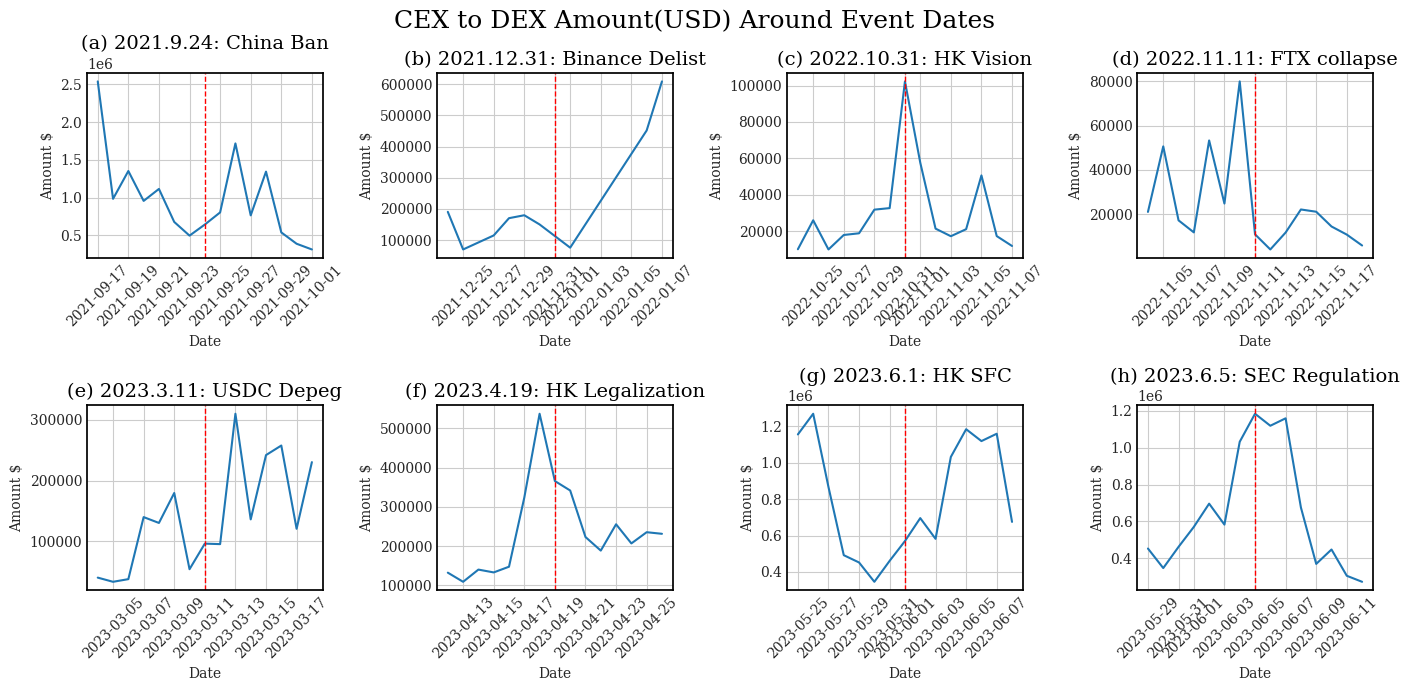

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the GitHub URL
url = 'https://raw.githubusercontent.com/SciEcon/IncidentsAnalysis2023/main/Data/collected/2_Netflow.csv'
data = pd.read_csv(url)

# Convert the DATE column to datetime objects
data['DATE'] = pd.to_datetime(data['DATE'])

# Define a list of dates to annotate
dates_to_annotate = [
    {'date': '2021-09-24', 'label': '(a) 2021.9.24: China Ban'},
    {'date': '2021-12-31', 'label': '(b) 2021.12.31: Binance Delist'},
    {'date': '2022-10-31', 'label': '(c) 2022.10.31: HK Vision'},
    {'date': '2022-11-11', 'label': '(d) 2022.11.11: FTX collapse'},
    {'date': '2023-03-11', 'label': '(e) 2023.3.11: USDC Depeg'},
    {'date': '2023-04-19', 'label': '(f) 2023.4.19: HK Legalization'},
    {'date': '2023-06-01', 'label': '(g) 2023.6.1: HK SFC'},
    {'date': '2023-06-05', 'label': '(h) 2023.6.5: SEC Regulation'}
]

# Sort the dates_to_annotate by date
dates_to_annotate.sort(key=lambda x: pd.to_datetime(x['date']))

# Define the number of days for the date range (1 week before and 1 week after)
date_range = pd.DateOffset(weeks=1)

# Create subplots for 8 small plots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('CEX to DEX Amount(USD) Around Event Dates', fontsize=18)

# Iterate through dates and create small plots
for i, date_info in enumerate(dates_to_annotate):
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start = date_to_plot - date_range
    date_end = date_to_plot + date_range
    subset_data = data[(data['DATE'] >= date_start) & (data['DATE'] <= date_end)]

    row = i // 4
    col = i % 4

    axs[row, col].plot(subset_data['DATE'], subset_data['Amount $ --> DEX'], linestyle='-')
    axs[row, col].set_title(date_info['label'], fontsize=14)
    axs[row, col].set_xlabel('Date', fontsize=10)
    axs[row, col].set_ylabel('Amount $', fontsize=10)
    axs[row, col].grid(True)

    # Add a red vertical line at the event date
    axs[row, col].axvline(x=date_to_plot, color='red', linestyle='--', linewidth=1)

    # Rotate x-axis labels by 45 degrees
    axs[row, col].tick_params(axis='x', labelrotation=45)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.89)

# Show the plots
plt.show()


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# create a blank DataFrame to store information
statistics_df = pd.DataFrame(columns=['Date', 'Mean_PreviousMonth', 'Mean_NextMonth','Mean_Difference'])

# Iterate through dates and create small plots
for date_info in dates_to_annotate:
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start_previous = date_to_plot - pd.DateOffset(weeks=1)
    date_end_previous = date_to_plot
    date_start_next = date_to_plot
    date_end_next = date_to_plot + pd.DateOffset(weeks=1)

    subset_data_previous = data[(data['DATE'] >= date_start_previous) & (data['DATE'] < date_end_previous)]
    subset_data_next = data[(data['DATE'] >= date_start_next) & (data['DATE'] <= date_end_next)]

    statistics = {
        'Date': date_info['date'],
        'Mean_PreviousMonth': subset_data_previous['Amount $ --> DEX'].mean(),
        'Mean_NextMonth': subset_data_next['Amount $ --> DEX'].mean(),
        'Mean_Difference': subset_data_next['Amount $ --> DEX'].mean() - subset_data_previous['Amount $ --> DEX'].mean(),
        }

    statistics_df = pd.concat([statistics_df, pd.DataFrame([statistics])], ignore_index=True)

# Print the DataFrame as a table
print(statistics_df)
statistics_df.to_csv('2_cex_to_dex_statistics_data.csv', index=False)


         Date  Mean_PreviousMonth  Mean_NextMonth  Mean_Difference
0  2021-09-24        1.159867e+06   814287.119038   -345580.085120
1  2021-12-31        1.461524e+05   378777.523137    232625.073918
2  2022-10-31        2.105332e+04    37441.647023     16388.331779
3  2022-11-11        3.700841e+04    12740.192082    -24268.215247
4  2023-03-11        8.815441e+04   186236.593254     98082.180014
5  2023-04-19        2.176512e+05   256145.877200     38494.700486
6  2023-06-01        7.205763e+05   877468.712850    156892.430536
7  2023-06-05        5.913304e+05   691249.913925     99919.550968


## NetFlow

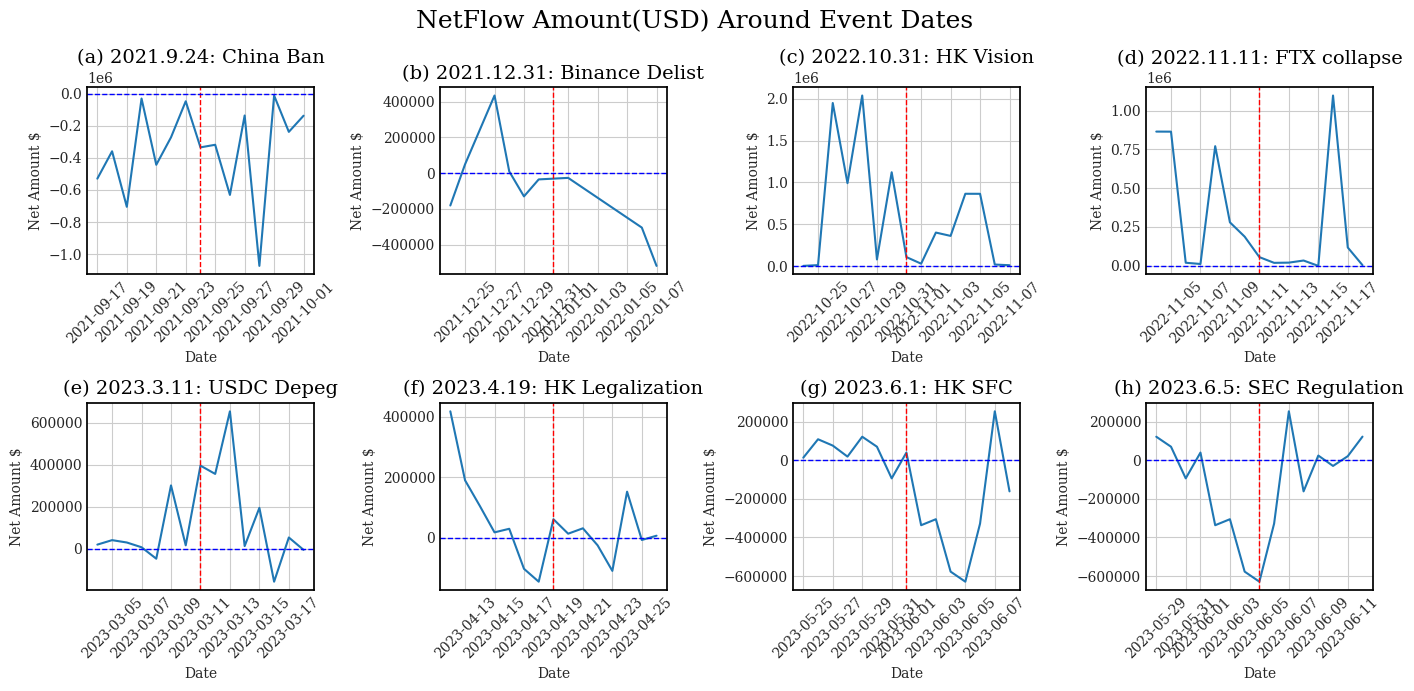

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the GitHub URL
url = 'https://raw.githubusercontent.com/SciEcon/IncidentsAnalysis2023/main/Data/collected/2_Netflow.csv'
data = pd.read_csv(url)

# Convert the DATE column to datetime objects
data['DATE'] = pd.to_datetime(data['DATE'])

# Define a list of dates to annotate
dates_to_annotate = [
    {'date': '2021-09-24', 'label': '(a) 2021.9.24: China Ban'},
    {'date': '2021-12-31', 'label': '(b) 2021.12.31: Binance Delist'},
    {'date': '2022-10-31', 'label': '(c) 2022.10.31: HK Vision'},
    {'date': '2022-11-11', 'label': '(d) 2022.11.11: FTX collapse'},
    {'date': '2023-03-11', 'label': '(e) 2023.3.11: USDC Depeg'},
    {'date': '2023-04-19', 'label': '(f) 2023.4.19: HK Legalization'},
    {'date': '2023-06-01', 'label': '(g) 2023.6.1: HK SFC'},
    {'date': '2023-06-05', 'label': '(h) 2023.6.5: SEC Regulation'}
]

# Sort the dates_to_annotate by date
dates_to_annotate.sort(key=lambda x: pd.to_datetime(x['date']))

# Define the number of days for the date range (1 week before and 1 week after)
date_range = pd.DateOffset(weeks=1)

# Create subplots for 8 small plots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('NetFlow Amount(USD) Around Event Dates', fontsize=18)

# Iterate through dates and create small plots
for i, date_info in enumerate(dates_to_annotate):
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start = date_to_plot - date_range
    date_end = date_to_plot + date_range
    subset_data = data[(data['DATE'] >= date_start) & (data['DATE'] <= date_end)]

    row = i // 4
    col = i % 4

    axs[row, col].plot(subset_data['DATE'], subset_data['Net Amount $'], linestyle='-')
    axs[row, col].set_title(date_info['label'], fontsize=14)
    axs[row, col].set_xlabel('Date', fontsize=10)
    axs[row, col].set_ylabel('Net Amount $', fontsize=10)
    axs[row, col].grid(True)

    # Add a red vertical line at the event date
    axs[row, col].axvline(x=date_to_plot, color='red', linestyle='--', linewidth=1)

    # Add a blue horizontal line at y=0
    axs[row, col].axhline(y=0, color='blue', linestyle='--', linewidth=1)

    # Rotate x-axis labels by 45 degrees
    axs[row, col].tick_params(axis='x', labelrotation=45)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.87)

# Show the plots
plt.show()


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# create a blank DataFrame to store information
statistics_df = pd.DataFrame(columns=['Date', 'Mean_PreviousMonth','Mean_NextMonth', 'Mean_Difference'])

# Iterate through dates and create small plots
for date_info in dates_to_annotate:
    date_to_plot = pd.to_datetime(date_info['date'])
    date_start_previous = date_to_plot - pd.DateOffset(weeks=1)
    date_end_previous = date_to_plot
    date_start_next = date_to_plot
    date_end_next = date_to_plot + pd.DateOffset(weeks=1)

    subset_data_previous = data[(data['DATE'] >= date_start_previous) & (data['DATE'] < date_end_previous)]
    subset_data_next = data[(data['DATE'] >= date_start_next) & (data['DATE'] <= date_end_next)]

    statistics = {
        'Date': date_info['date'],
        'Mean_PreviousMonth': subset_data_previous['Net Amount $'].mean(),
        'Mean_NextMonth': subset_data_next['Net Amount $'].mean(),
        'Mean_Difference': subset_data_next['Net Amount $'].mean() - subset_data_previous['Net Amount $'].mean(),
        }

    statistics_df = pd.concat([statistics_df, pd.DataFrame([statistics])], ignore_index=True)

# Print the DataFrame as a table
print(statistics_df)
statistics_df.to_csv('2_netflow_statistics_data.csv', index=False)


         Date  Mean_PreviousMonth  Mean_NextMonth  Mean_Difference
0  2021-09-24      -341136.019243  -360173.156380    -19037.137137
1  2021-12-31        24670.611055  -282890.693083   -307561.304138
2  2022-10-31       885073.433546   331902.224704   -553171.208842
3  2022-11-11       427660.542991   167398.326933   -260262.216059
4  2023-03-11        51931.945592   187712.788332    135780.842740
5  2023-04-19        73203.381654    15271.336691    -57932.044963
6  2023-06-01        44649.627069  -255828.021319   -300477.648387
7  2023-06-05      -154764.534814   -91176.405729     63588.129086
